In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XdIVFOk3Zwld6iHTbplbYDjCY8GM3lOCMsi-UHSM-_zE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'nidsproject-donotdelete-pr-0qmvjviurne62g'
object_key = 'Full_Train_Data_Kavish.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [8]:
print("Shape of dataset:", df_1.shape)
df_1.info()


Shape of dataset: (25192, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null 

In [9]:
print("Column names:\n", df_1.columns.tolist())


Column names:
 ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


In [10]:
# Try most likely target columns
print(df_1['label'].value_counts())          # Try this first
# print(df_1['attack_class'].value_counts())   # or this
# print(df_1['class'].value_counts())          # or this


KeyError: 'label'

In [11]:
# Show all column names with index numbers
for i, col in enumerate(df_1.columns):
    print(f"{i}: {col}")


0: duration
1: protocol_type
2: service
3: flag
4: src_bytes
5: dst_bytes
6: land
7: wrong_fragment
8: urgent
9: hot
10: num_failed_logins
11: logged_in
12: num_compromised
13: root_shell
14: su_attempted
15: num_root
16: num_file_creations
17: num_shells
18: num_access_files
19: num_outbound_cmds
20: is_host_login
21: is_guest_login
22: count
23: srv_count
24: serror_rate
25: srv_serror_rate
26: rerror_rate
27: srv_rerror_rate
28: same_srv_rate
29: diff_srv_rate
30: srv_diff_host_rate
31: dst_host_count
32: dst_host_srv_count
33: dst_host_same_srv_rate
34: dst_host_diff_srv_rate
35: dst_host_same_src_port_rate
36: dst_host_srv_diff_host_rate
37: dst_host_serror_rate
38: dst_host_srv_serror_rate
39: dst_host_rerror_rate
40: dst_host_srv_rerror_rate
41: class


In [12]:
print(df_1[' class'].value_counts())


KeyError: ' class'

In [13]:
print(df_1['attack_class'].value_counts())


KeyError: 'attack_class'

In [14]:
df_1.columns = df_1.columns.str.strip()


In [15]:
print("class" in df_1.columns)   # Should return True
print(df_1.columns.tolist())     # See all column names again


True
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


In [16]:
print(df_1['class'].unique())
print(df_1['class'].value_counts())


['normal' 'anomaly']
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [17]:
# Identify categorical (non-numeric) columns
cat_cols = df_1.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['protocol_type', 'service', 'flag', 'class']


In [18]:
df_encoded = pd.get_dummies(df_1, columns=['protocol_type', 'service', 'flag'])
df_encoded['class'] = df_encoded['class'].map({'normal': 0, 'anomaly': 1})


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)



In [22]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9978170271879341
Confusion Matrix:
 [[2671    3]
 [   8 2357]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



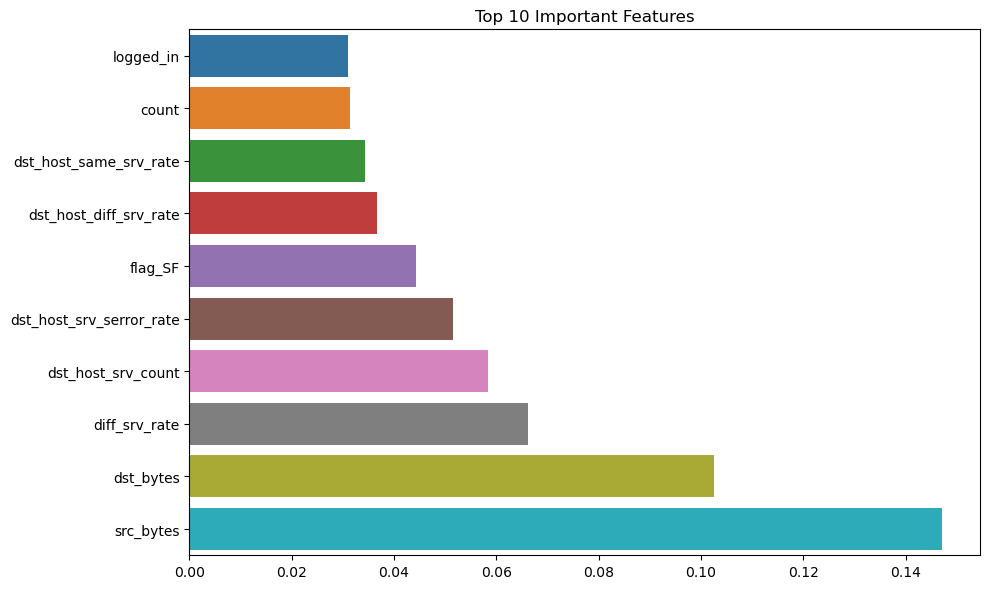

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = importances.argsort()[-10:]  # Top 10 features

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


In [24]:
import joblib

# Save model to a file
joblib.dump(rf_model, 'nids_random_forest_model.pkl')


['nids_random_forest_model.pkl']